## 전처리 순서
1. 데이터 피처 확인
2. 결측치 처리
3. 라벨링으로 문자열 데이터 처리
4. 이상치 데이터 처리
5. 숫자열 데이터 시각화
6. StandardScaler와 로그변환 활용하여 데이터 표준정규화
7. EDA 분석(히트맵, 파이차트)
8. 남은 문자열 데이터 원핫 인코딩

In [34]:
pip list

Package                            Version
Note: you may need to restart the kernel to use updated packages.---------------------------------- -------------------
-5py                               2.10.0
-cikit-learn                       0.24.1
-umpy                              1.20.1

absl-py                            0.13.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asgiref                            3.4.1
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8   

In [32]:
pip install -U scikit-learn


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.1.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

# Target 값 : price

In [2]:
car_df_org = pd.read_csv('./data/완성_수정.csv')
car_df = car_df_org.copy()
car_df.head()

,Unnamed: 0,brand,name,type,km,year,accident,color,location,price,wd,trim
0,0,기아,K5,가솔린,110575,2011,무사고,검정색,인천,650,2WD,1
1,1,기아,K5,가솔린,106819,2014,무사고,검정색,인천,940,2WD,1
2,2,기아,K5,가솔린,29151,2019,무사고,검정색,충북,1890,2WD,1
3,3,기아,K5,가솔린,8766,2021,무사고,검정색,경기,3190,2WD,1
4,4,기아,K5,가솔린,101196,2012,무사고,검정색,대구,820,2WD,2


### 1. 데이터 피처 확인

- brand : 제조사
- name : 차종
- type : 연료형태
- km : 달린 km 수
- year : 제조년도
- accident : 사고 여부
- color : 색상 (검정색, 회색, 흰색, 기타)
- location : 판매 장소
- price : 판매 가격
- wd : 차 구동방식
- trim : 차 트림
    - 1 = 기본
    - 2 = 조금 좋은 옵션
    - 3 = 많이 좋은 옵션
    - 4 = 가장 좋은 옵션

In [3]:
car_df.drop('Unnamed: 0',axis=1, inplace=True)

In [4]:
car_df.head()

,brand,name,type,km,year,accident,color,location,price,wd,trim
0,기아,K5,가솔린,110575,2011,무사고,검정색,인천,650,2WD,1
1,기아,K5,가솔린,106819,2014,무사고,검정색,인천,940,2WD,1
2,기아,K5,가솔린,29151,2019,무사고,검정색,충북,1890,2WD,1
3,기아,K5,가솔린,8766,2021,무사고,검정색,경기,3190,2WD,1
4,기아,K5,가솔린,101196,2012,무사고,검정색,대구,820,2WD,2


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64805 entries, 0 to 64804
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     64805 non-null  object
 1   name      64805 non-null  object
 2   type      64805 non-null  object
 3   km        64805 non-null  int64 
 4   year      64805 non-null  int64 
 5   accident  64805 non-null  object
 6   color     64805 non-null  object
 7   location  64805 non-null  object
 8   price     64805 non-null  int64 
 9   wd        64805 non-null  object
 10  trim      64805 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 5.4+ MB


### 2. 결측치 처리

In [6]:
print('데이터 세트의 Shape:', car_df.shape)
print('\n전체 feature 들의 type \n',car_df.dtypes.value_counts())

# Null 컬럼 확인 : Null이 있는 컬럼과 그 건수를 내림차순으로 출력
isnull_series = car_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (64805, 11)

전체 feature 들의 type 
 object    7
int64     4
dtype: int64

Null 컬럼과 그 건수:
  Series([], dtype: int64)


In [7]:
#불필요한 컬럼 삭제
car_df.drop(['location'],axis=1,inplace=True)

In [8]:
car_df['type'] = car_df.apply(lambda x: x['type'].replace('가솔린+LPG','바이퓨얼'), axis = 1)

#### 문자열 데이터 처리 방식
- 라벨링 : accident, wd
- 원핫인코딩 : brand, name, type, color

### 3. 라벨링으로 문자열 데이터 처리

In [9]:
car_df['accident_e']=0
for i in range(0,len(car_df)):
        if car_df['accident'][i]=='사고':
            car_df['accident_e'][i]=0
        elif car_df['accident'][i]=='단순사고(접촉)':
            car_df['accident_e'][i]=1
        elif car_df['accident'][i]=='단순교환':
            car_df['accident_e'][i]=2
        else: car_df['accident_e'][i]=3
            
car_df['wd_e']=0
for i in range(0,len(car_df)):
        if car_df['wd'][i]=='2WD':
            car_df['wd_e'][i]=0
        else: car_df['wd_e'][i]=1
            
car_df['accident'] = car_df['accident_e']
car_df['wd'] = car_df['wd_e']
car_df['year'] = 2022 - car_df['year']
del car_df['accident_e']
del car_df['wd_e']

### 4. 이상치 데이터 처리

In [10]:
car_df.drop(car_df.loc[car_df['price']<=100].index, inplace=True)
car_df.drop(car_df.loc[car_df['km']>=400000].index, inplace=True)
car_df.drop(car_df.loc[car_df['price']>=50000].index, inplace=True)

##### 왜곡된 정도 추출 
- 모든 변수를 그래프로 확인 할 수 없으므로 
    - skew() 함수 사용
    - 주의. 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처 제외


In [11]:
from scipy.stats import skew

# 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처 제외
feautres_index = car_df.dtypes[car_df.dtypes != 'object'].index

feautres_index

# 왜도 확인
skew_features = car_df[feautres_index].apply(lambda x : skew(x))
print(skew_features.sort_values(ascending=False))

price       2.621241
wd          1.618280
km          0.909977
year        0.857548
trim        0.815599
accident   -6.186867
dtype: float64


### 5. 숫자열 데이터 시각화

#### km, year, price 변환 전 시각화

<AxesSubplot:title={'center':'km Histogram'}, xlabel='km', ylabel='Density'>

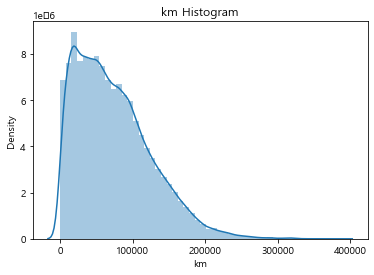

In [12]:
plt.title('km Histogram')
sns.distplot(car_df['km'])
#plt.savefig('km Histogram.png')

<AxesSubplot:title={'center':'year Histogram'}, xlabel='year', ylabel='Density'>

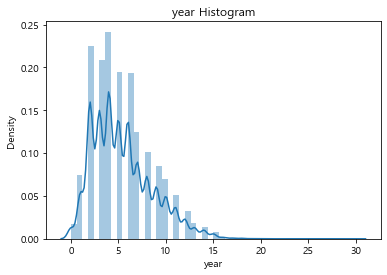

In [13]:
plt.title('year Histogram')
sns.distplot(car_df['year'])
#plt.savefig('year Histogram.png')

<AxesSubplot:title={'center':'Sale Price Histogram'}, xlabel='price', ylabel='Density'>

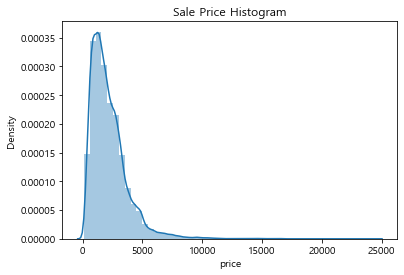

In [14]:
plt.title('Sale Price Histogram')
sns.distplot(car_df['price'])
#plt.savefig('log price Histogram.png')

- 데이터의 분포가 중심에서 왼쪽으로 치우친 형태
- 정규 분포에서 벗어나 있음

### 6. StandardScaler와 로그변환 활용하여 데이터 표준정규화

#### km와 year를 StandardScaler 이용하여 표준화 후 시각화

In [15]:
# # StandardScaler 이용 표준화해서 변환

# from sklearn.preprocessing import StandardScaler

# car_km_df = car_df[['km','year']]

# # StandardScaler 객체 생성
# scaler = StandardScaler()

# # fit() : 데이터 변환을 위한 기준 정보 설정
# scaler.fit(car_km_df)

# # fit() : 설정된 정보를 이용해 데이터 변환
# car_scaled = scaler.transform(car_km_df)

# # numpy ndarry를 DataFrame으로 변환
# car_df_scaled = pd.DataFrame(data=car_scaled, columns=['km','year'])

# print('feature 들의 평균 값')
# print(car_df_scaled.mean())
# print('\nfeature 들의 분산 값')
# print(car_df_scaled.var())

# # 모든 컬럼 값의 평균이 0에 가깝고 분산이 1에 가까운 값으로 변환

In [16]:
# plt.title('km Histogram')
# sns.distplot(car_df['km'])

In [17]:
# # 변환 데이터 삽입
# car_df[['km','year']] = car_df_scaled[['km','year']]
# car_df.dropna(inplace=True)

**타겟값인 Price를 로그변환 후 시각화**

<AxesSubplot:title={'center':'Log Transformed price Histogram'}, xlabel='price', ylabel='Density'>

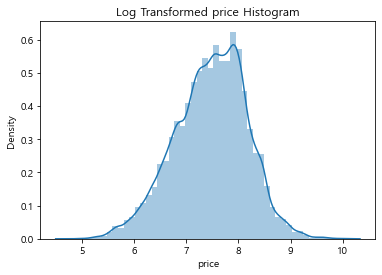

In [18]:
# 결과값을 로그 변환하고 다시 분포도 확인
plt.title('Log Transformed price Histogram')
price = np.log1p(car_df['price'])
sns.distplot(price)

In [19]:
car_df['price'] = np.log1p(car_df['price']) #로그변환 값으로 타겟값을 대체

In [20]:
car_df.head()

,brand,name,type,km,year,accident,color,price,wd,trim
0,기아,K5,가솔린,110575,11,3,검정색,6.478510,0,1
1,기아,K5,가솔린,106819,8,3,검정색,6.846943,0,1
2,기아,K5,가솔린,29151,3,3,검정색,7.544861,0,1
3,기아,K5,가솔린,8766,1,3,검정색,8.068090,0,1
4,기아,K5,가솔린,101196,10,3,검정색,6.710523,0,2


### 7. EDA 분석(히트맵, 파이차트)

<AxesSubplot:>

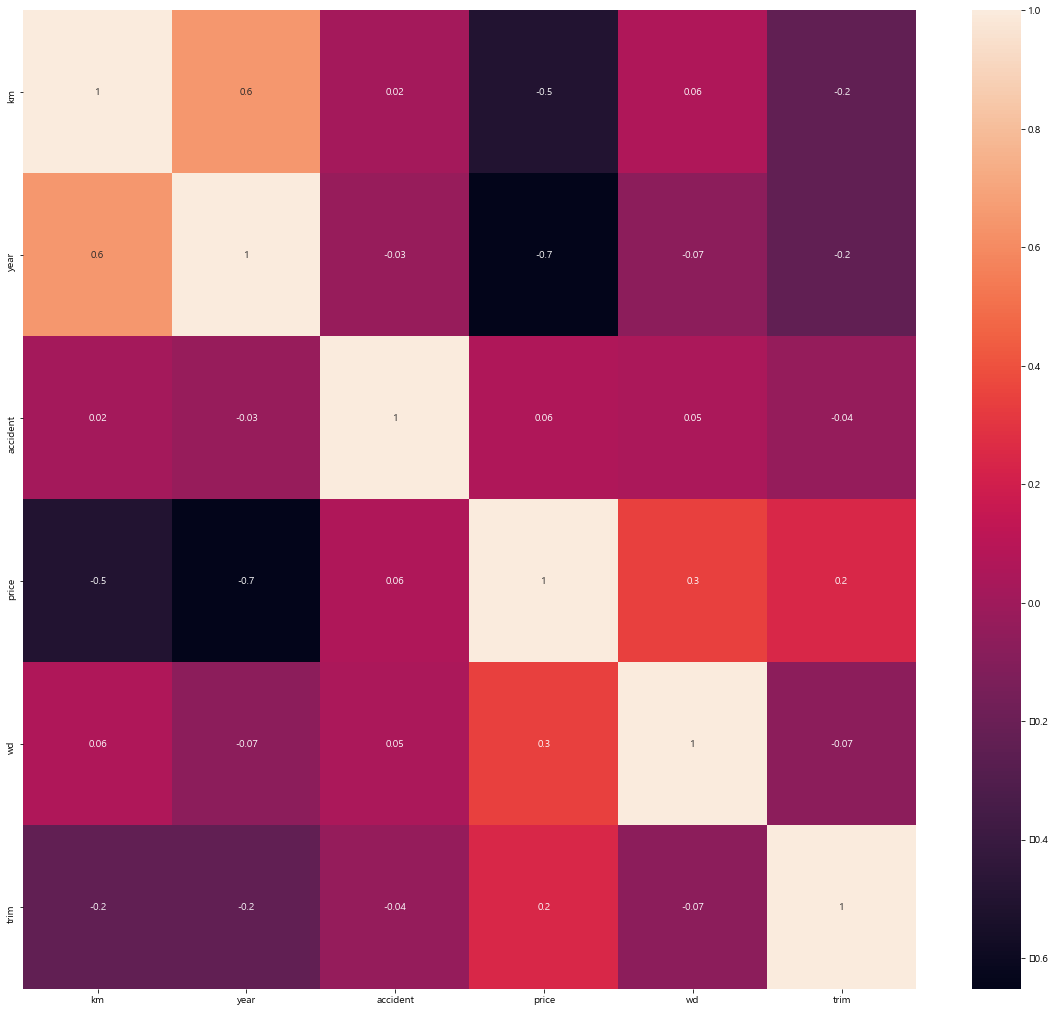

In [21]:
plt.figure(figsize=(20,18))

corr = car_df.corr()
sns.heatmap(corr, annot=True, fmt='.1g')

### 파이차트

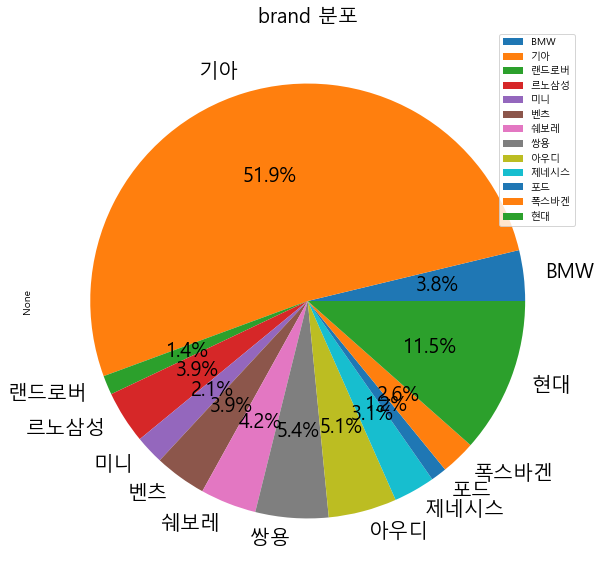

In [22]:
#brand_per = pd.Series(brand_per['brand'], index=brand_per.index)
#brand = ['현대','폭스바겐','제네시스','쌍용','르노삼성','랜드로버','미니포드','쉐보레','BMW','벤츠']

brand = car_df_org.groupby('brand')
brand_sr = brand.size()
brand_sr.plot(kind='pie', figsize=(10,10), autopct= '%1.1f%%', textprops={'size':20})
plt.title('brand 분포', size=20)
plt.legend(brand_sr.index, loc='best')
plt.show()
#plt.savefig('brand pi chart.png')

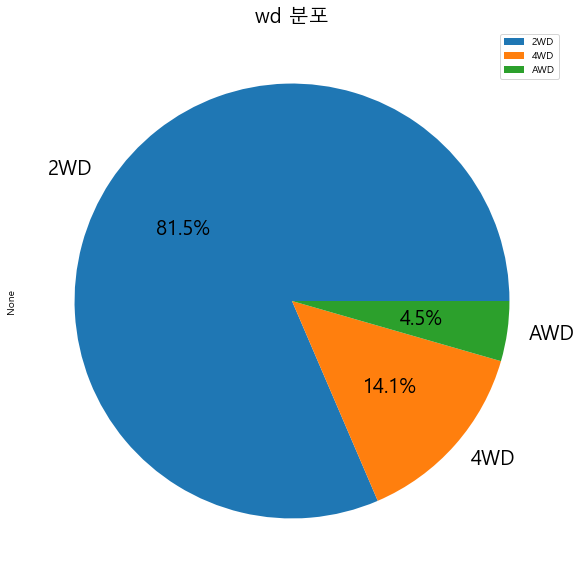

In [23]:
wd = car_df_org.groupby('wd')
wd_sr = wd.size()
wd_sr.plot(kind='pie', figsize=(10,10), autopct= '%1.1f%%', textprops={'size':20})
plt.title('wd 분포', size=20)
plt.legend(wd_sr.index, loc='best')
plt.show()
#plt.savefig('wd pi chart.png')

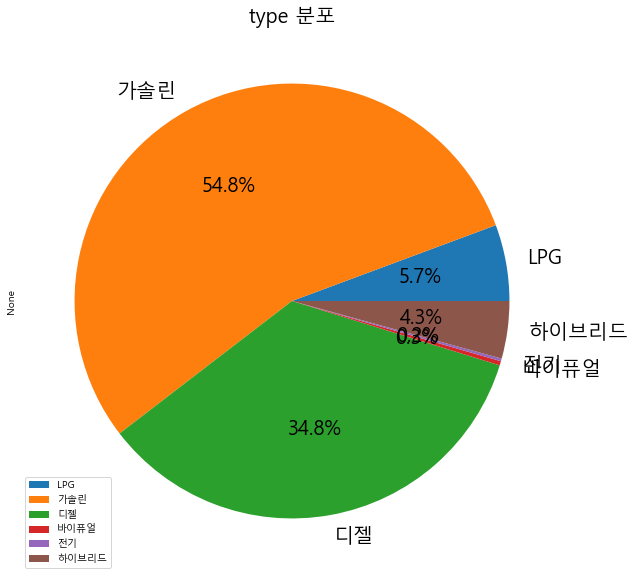

In [24]:
type1 = car_df.groupby('type')
type_sr = type1.size()
type_sr.plot(kind='pie', figsize=(10,10), autopct= '%1.1f%%', textprops={'size':20})
plt.title('type 분포', size=20)
plt.legend(type_sr.index, loc='best')
plt.show()
#plt.savefig('type pi chart.png')

#### 전처리 끝난 후 왜도 재확인

In [25]:
feautres_index = car_df.dtypes[car_df.dtypes != 'object'].index

feautres_index

# 왜도 확인
skew_features = car_df[feautres_index].apply(lambda x : skew(x))
print(skew_features.sort_values(ascending=False))

wd          1.618280
km          0.909977
year        0.857548
trim        0.815599
price      -0.246160
accident   -6.186867
dtype: float64


### 8. 원핫 인코딩으로 처리

In [26]:
print('get_dummies() 수행 전 데이터 Shape:', car_df.shape)
car_df_ohe = pd.get_dummies(car_df)
print('get_dummies() 수행 후 데이터 Shape:', car_df_ohe.shape)
car_df_ohe.head()

get_dummies() 수행 전 데이터 Shape: (64801, 10)
get_dummies() 수행 후 데이터 Shape: (64801, 252)


,km,year,accident,price,wd,trim,brand_BMW,brand_기아,brand_랜드로버,brand_르노삼성,...,type_LPG,type_가솔린,type_디젤,type_바이퓨얼,type_전기,type_하이브리드,color_검정색,color_기타,color_회색,color_흰색
0,110575,11,3,6.478510,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,106819,8,3,6.846943,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,29151,3,3,7.544861,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,8766,1,3,8.068090,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,101196,10,3,6.710523,0,2,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [27]:
car_list = car_df_ohe.columns.tolist()

In [28]:
car_list

['km',
 'year',
 'accident',
 'price',
 'wd',
 'trim',
 'brand_BMW',
 'brand_기아',
 'brand_랜드로버',
 'brand_르노삼성',
 'brand_미니',
 'brand_벤츠',
 'brand_쉐보레',
 'brand_쌍용',
 'brand_아우디',
 'brand_제네시스',
 'brand_포드',
 'brand_폭스바겐',
 'brand_현대',
 'name_118',
 'name_200',
 'name_320',
 'name_330',
 'name_420   쿠페',
 'name_420  그란쿠페',
 'name_428   컨버터블',
 'name_428   쿠페',
 'name_520',
 'name_528',
 'name_530',
 'name_640    그란쿠페',
 'name_730',
 'name_730Ld',
 'name_740',
 'name_740Li',
 'name_750Ld',
 'name_750Li',
 'name_A200',
 'name_A220',
 'name_A3',
 'name_A4',
 'name_A45',
 'name_A5',
 'name_A6',
 'name_A7',
 'name_A8',
 'name_B200',
 'name_C200',
 'name_C220',
 'name_C220 블루텍',
 'name_C63',
 'name_CC',
 'name_CC 블루모션',
 'name_CLA220',
 'name_CLA250',
 'name_CLA45',
 'name_CLS250',
 'name_CLS350',
 'name_CLS4.0',
 'name_CLS450',
 'name_CLS63',
 'name_E200',
 'name_E220',
 'name_E220 블루텍',
 'name_E250',
 'name_E250 블루텍',
 'name_E300',
 'name_E350',
 'name_E400',
 'name_EQ900',
 'name_F150',
 '

In [29]:
car_df_ohe.to_csv("./data/최종 전처리2.csv", index = False)